# **Project: Web Market Object Detection Using Yolov3**

- **By : Lokesh Baviskar**

- **Email id- Lokeshbaviskar4@gmail.com**

- **Contact No - 8793992761**
___

# Dataset Information:

- Dataset Link :  https://www.kaggle.com/datasets/manikchitralwar/webmarket-dataset

- Dataset contain 300 images having 1 class and annotations csv file


# Step 1: Image Annotation using Roboflow
- In order to build a custom object detector ***first we need to annotate images with corresponding bounding box and labels*** so that the detector can be efficiently trained to detect objects.
- For this project I have use ***Roboflow tool for Image Annotation***. Link: https://app.roboflow.com/
- Image are resize to ***416 * 416 size.***
- Train Test split not applied in at this point preprocessing as files name needed to rename for convience. Data split is done using script file using at later steps.
- No Image Augmentation applied.
- **Screenshot of Final Output** :-

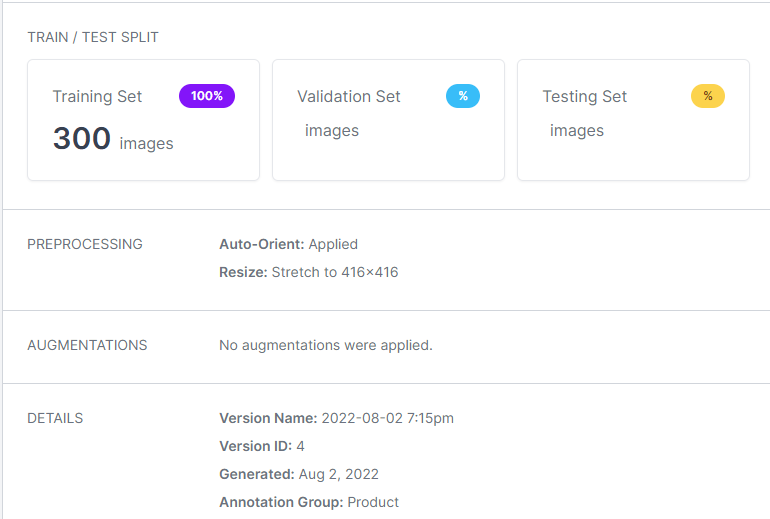

**Sample Annotated Image :**

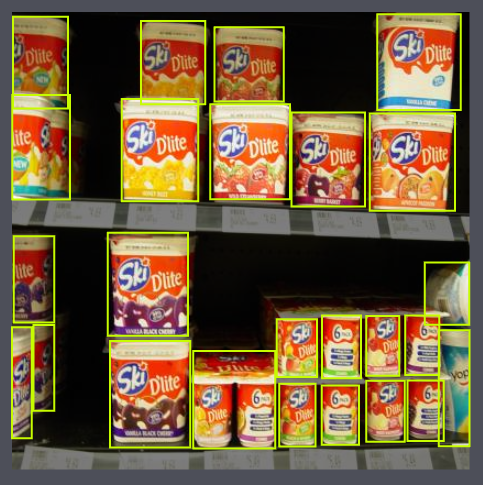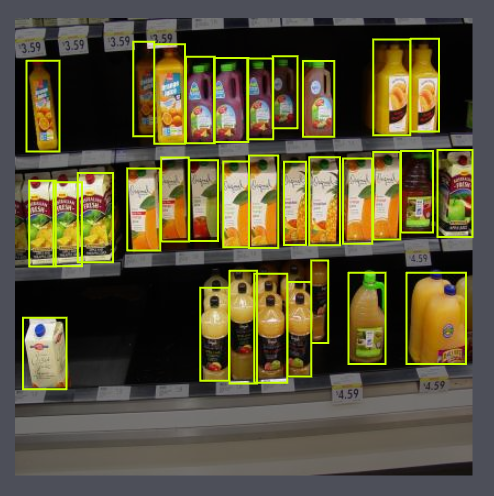

# Step 2: Upload data in Google drive and Cloning Darknet GitHub Repos
- Unzipping Custom image Data (After Renaming)
- Cloning Darknet GitHub Repos
- Making changes in Make File

- #### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- #### Unziping Custom data

In [ ]:
# Listing Files in Working directory
!ls '/content/drive/MyDrive/Webmarket_yolov3_object_detection'

Custom_data.zip  Webmarket_yolov3_obj_detection.ipynb


In [ ]:
!unzip '/content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data.zip' -d '/content/drive/MyDrive/Webmarket_yolov3_object_detection'

Archive:  /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data.zip
   creating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_1.jpg  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_1.txt  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_10.jpg  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_10.txt  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_100.jpg  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_100.txt  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_101.jpg  
  inflating: /content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_101.txt  
  inflating: /content/dr

- #### Cloning Darknet Github Repo

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/Webmarket_yolov3_object_detection/darknet'

Cloning into '/content/drive/MyDrive/Webmarket_yolov3_object_detection/darknet'...
remote: Enumerating objects: 15460, done.
remote: Total 15460 (delta 0), reused 0 (delta 0), pack-reused 15460
Receiving objects: 100% (15460/15460), 14.07 MiB | 8.01 MiB/s, done.
Resolving deltas: 100% (10387/10387), done.
Checking out files: 100% (2053/2053), done.


- #### Making Changes in Make file to enable GPU and OpenCV

In [ ]:
%cd '/content/drive/MyDrive/Webmarket_yolov3_object_detection/darknet'

/content/drive/MyDrive/Webmarket_yolov3_object_detection/darknet


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# Step 3: Configuring Files for Training

**This step involves properly configuring your custom .cfg file, obj.data, obj.names, test.txt and train.txt file.**

### **i) yolov3.Cfg File Changes**
Copy over the yolov3.cfg to edit

- #### **1. Changing batches and subdivision**

    batches = 32

    subdivision = 16

- #### **2. Changes in Max Batches**

    Default : max_batches = 500200 

    Change it to according formula: max_batches = number of classes*2000  = 2000

- #### **3.Changes in line steps**

    Default : steps=400000,450000

    Change to 10% Margin : steps = 1800,2000

- #### **4.Changes in Yolo Layer**

    Default :classes=80

    Change to : No of classes = classes = 1

- #### **5.Changes in No of Filter**

    Default : filters=255

    Change to : Filters = (Number of classes * 3) +5 = 18


**Note:** I set my **max_batches = 2000**, **steps = 1800, 2200**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers. 

#### Compliation: Make file

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

### **ii) obj.names and obj.data using Python Script**

- In this section Classes.names and labelled_data.data file are created using Python Script file.

In [ ]:
%cd '/content/drive/MyDrive/Webmarket_yolov3_object_detection'

/content/drive/MyDrive/Webmarket_yolov3_object_detection


In [ ]:
!python Custom_data/creating-files-data-and-name.py

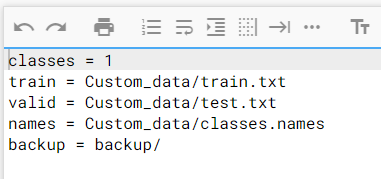

### **iii) Generating train.txt and test.txt (Train test split)**
- The last configuration file needed before we can begin to train our custom detector is to **create train.txt file and test.txt fie which hold the relative paths to all our training & test images.**
- For this purpose I have used **python script file to split data.**

In [ ]:
!python Custom_data/creating-train-and-test-txt-files.py

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long.

In [ ]:
%cd '/content/drive/MyDrive/Webmarket_yolov3_object_detection/custom_weights'

/content/drive/MyDrive/Webmarket_yolov3_object_detection/custom_weights


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2022-08-02 15:27:58--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-08-02 15:27:58--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  14.2MB/s    in 11s     

2022-08-02 15:28:10 (14.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Custom Yolo Object Detector!
We are now ready to train images on custom YOLOv3 object detector  

In [ ]:
%cd '/content/drive/MyDrive/Webmarket_yolov3_object_detection'

/content/drive/MyDrive/Webmarket_yolov3_object_detection


In [ ]:
!darknet/darknet

usage: darknet/darknet <function>


**Training model**

In [ ]:
!darknet/darknet detector train Custom_data/labelled_data.data darknet/cfg/yolov3.cfg custom_weights/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 2506252, rewritten_bbox = 0.047721 % 
]2;1926/2000: loss=5.9 hours left=0.2
 1926: 5.874454, 6.703287 avg loss, 0.000100 rate, 5.781766 seconds, 61632 images, 0.175625 hours left
Loaded: 0.000033 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.846119), count: 105, class_loss = 6.768236, iou_loss = 4.200136, total_loss = 10.968371 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.726444), count: 21, class_loss = 5.733743, iou_loss = 3.480796, total_loss = 9.214539 
 total_bbox = 2506378, rewritten_bbox = 0.047718 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.800353), count: 20, class_loss = 3.275875, iou_loss = 0.939662, total_loss = 4.215537 

In [ ]:
%cd "/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection"

/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection


# Step 6: Testing Custom Object Detector with Test image !!!
Our Model is Trained ! Now We are going to test a custom object detector model to make predication on test image.

In [ ]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd '/content/drive/MyDrive/Webmarket_yolov3_object_detection'

/content/drive/MyDrive/Webmarket_yolov3_object_detection


In [ ]:
#path = "/content/drive/MyDrive/Mushroom_Yolov3_Custom_Object_detetection"
weight = r"/content/drive/MyDrive/Webmarket_yolov3_object_detection/backup/yolov3_final.weights"
cfg = r"/content/drive/MyDrive/Webmarket_yolov3_object_detection/darknet/cfg/yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(cfg,weight)

In [ ]:
classes = []
with open('/content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/classes.names','r') as f:
    classes = f.read().splitlines()

#### Reading new test image using openCV:
- Resizing image to size 416*416
- Scaling Image : Normalisation
- BGR TO RGB format


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Webmarket_yolov3_object_detection/Custom_data/webmarket_4.jpg')
hight,width,_ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)
net.setInput(blob)
output_layers_name = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_name)

Appending Bounding box, confidences score & class_ids into lists


In [ ]:
boxes =[] # to store bounding box coordinate
confidences = [] # to store confidence score
class_ids = [] # to store class_ids

for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3]* hight)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

#### Applying Nonmax Suppression for valid bounding box

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.7,.5)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [ ]:
if  len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i],2))
        color = colors[i]
        #color = (255,255,255)
        cv2.rectangle(img,(x,y),(x+w,y+h),color,5)
        cv2.putText(img, label + " " + confidence, (x,y),font,1,color,1,cv2.LINE_AA)
        
else:
    print('Classs not found')

#### Displaying Test image with detected object

In [ ]:
from google.colab.patches import cv2_imshow

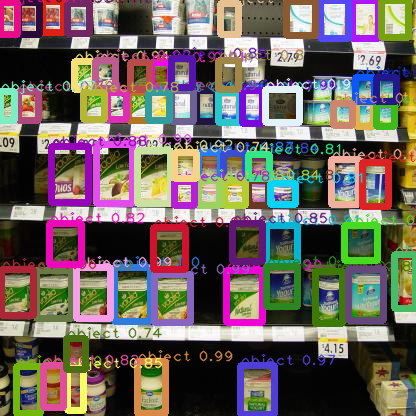

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()